In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset_path = r'C:\Users\aasth\anaconda3\xyz.csv'
df = pd.read_csv(dataset_path,encoding="utf-8")

In [7]:
df.shape

(10, 4)

In [8]:
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
         user_id  content_id
count  10.000000    10.00000
mean    1.900000   105.50000
std     0.875595     3.02765
min     1.000000   101.00000
25%     1.000000   103.25000
50%     2.000000   105.50000
75%     2.750000   107.75000
max     3.000000   110.00000


In [28]:
user_actions= df.groupby('user_id')['action'].value_counts()
print(user_actions)

user_id  action 
1        like       2
         comment    1
         share      1
2        comment    2
         like       1
3        like       2
         share      1
Name: count, dtype: int64


In [36]:
user_actions= df.groupby('user_id')['action'].value_counts().unstack()
print(user_actions)

action   comment  like  share
user_id                      
1            1.0   2.0    1.0
2            2.0   1.0    NaN
3            NaN   2.0    1.0


Text(0, 0.5, 'action')

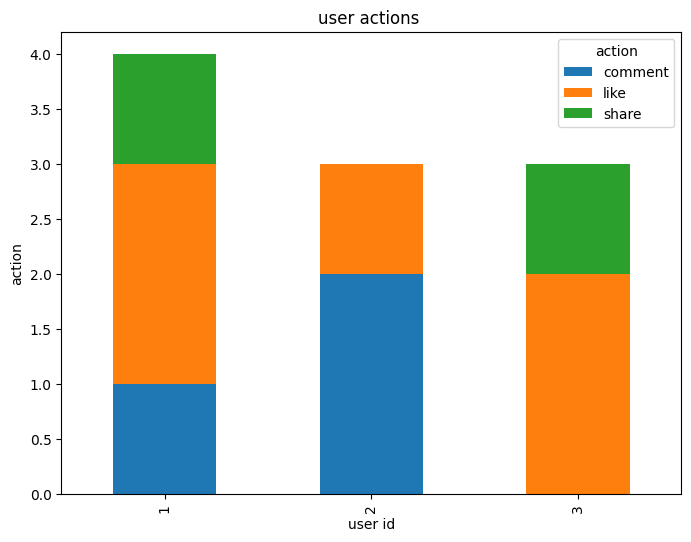

In [44]:
user_actions.plot(kind='bar',stacked=True,figsize=(8,6))
plt.title('user actions ')
plt.xlabel('user id')
plt.ylabel('action')

In [52]:
most_perfromed_action=df['action'].value_counts().idxmax()
print(most_perfromed_action)

like


In [54]:
#user with highest engagement
user_engagement = df.groupby('user_id')['action'].count()
print(user_engagement)
user_engagement_highest=user_engagement.idxmax()
print(user_engagement_highest)

user_id
1    4
2    3
3    3
Name: action, dtype: int64
1


In [13]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [89]:
df['day']=df['timestamp'].dt.date
df['hour']=df['timestamp'].dt.hour

In [70]:
daily_activity=df.groupby(['day','user_id'])['action'].count().unstack()

In [92]:
daily_activity=df.groupby('day')['action'].count()

In [74]:
hourly_activity=df.groupby(['hour','user_id'])['action'].count()

In [96]:
hourly_activity=df.groupby('hour')['action'].count()

In [71]:
print(daily_activity)

user_id     1  2  3
day                
2023-01-01  2  1  1
2023-01-02  1  1  1
2023-01-03  1  1  1


In [72]:
print(hourly_activity)

hour
8     1
9     1
10    2
11    1
12    1
14    1
15    1
16    1
17    1
Name: action, dtype: int64


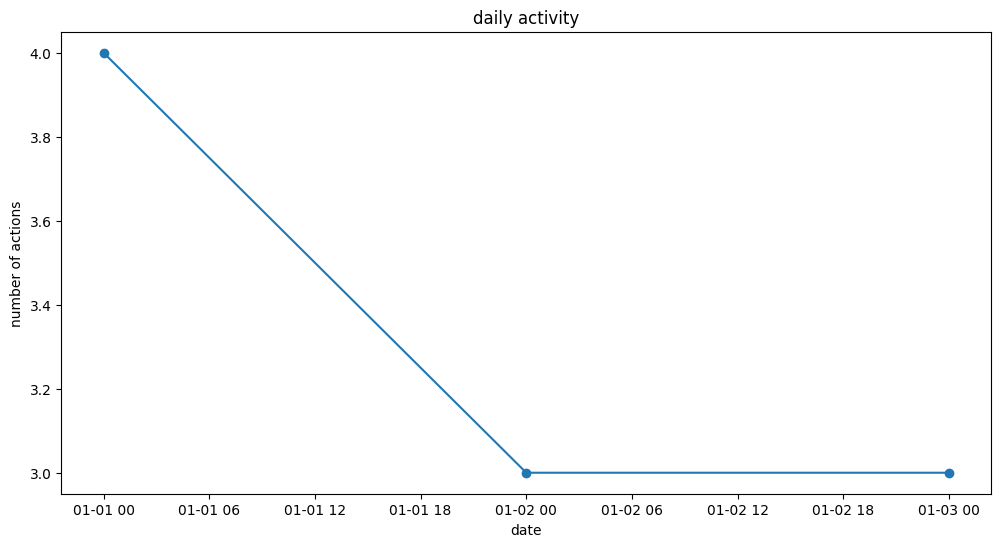

In [95]:
plt.figure(figsize=(12,6))
daily_activity.plot(kind='line',marker='o')
plt.title('daily activity')
plt.xlabel('date')
plt.ylabel('number of actions')
plt.show()

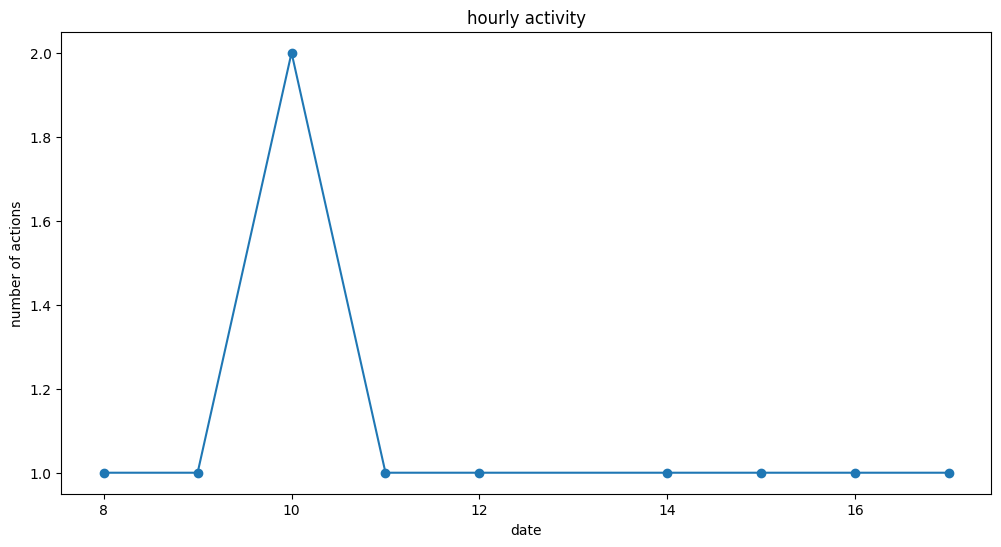

In [97]:
plt.figure(figsize=(12,6))
hourly_activity.plot(kind='line',marker='o')
plt.title('hourly activity')
plt.xlabel('date')
plt.ylabel('number of actions')
plt.show()